Используйте базу трафика с сайта компании.

Напишите модель для прогнозирования трафика.

При параметре `length = 60`, добейтесь максимально точного соответствия между графиками корреляции исходного сигнала и прогноза.

# Загрузка всех библиотек
В этом блоке выполняется импорт основных библиотек, необходимых для работы с данными, построения моделей и визуализации.

- import numpy as np и import pandas as pd — импорт библиотек для работы с массивами и табличными данными.

- import warnings — модуль для управления предупреждениями.

- import matplotlib.pyplot as plt — библиотека для построения графиков.

- import gdown — утилита для загрузки файлов из облака Google.

- Импорт слоев из TensorFlow Keras (BatchNormalization, Conv1D, Dense и другие) — для создания нейросетевой архитектуры.

- Импорт моделей Model, Sequential из Keras для построения моделей.

- Импорт оптимизатора Adam для настройки процесса обучения модели.

- Импорт TimeseriesGenerator для подготовки временных рядов в виде обучающих последовательностей.

- Импорт нормализаторов MinMaxScaler, StandardScaler из sklearn для масштабирования данных.

- %matplotlib inline — команда для отображения графиков прямо в ноутбуке Jupyter/Colab.

- warnings.filterwarnings('ignore') — отключение предупреждений для чистоты вывода.


In [ ]:
# Работа с массивами
import numpy as np
import pandas as pd
import warnings

# Отрисовка графиков
import matplotlib.pyplot as plt

# Загрузка датасетов из облака google
import gdown

# Классы-конструкторы моделей нейронных сетей
from tensorflow.keras.layers import (BatchNormalization, Conv1D, Conv2D,
                                     Dense, Dropout, Flatten, GlobalMaxPooling1D,
                                     Input, LSTM, MaxPooling1D, RepeatVector, concatenate)
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# Нормировщики
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Отрисовка графики в ячейке colab
%matplotlib inline

# Отключение предупреждений
warnings.filterwarnings('ignore')

**Настройка стиля и размера графиков по умолчанию**

В этом блоке задаются параметры отображения графиков для последующей визуализации данных и результатов обучения модели.

- from pylab import rcParams — импорт параметров для настройки визуализации.

- plt.style.use('ggplot') — установка стиля графиков в стиле ggplot, который обеспечивает приятный и удобочитаемый вид.

- rcParams['figure.figsize'] = (14, 7) — установка размера всех графиков по умолчанию: ширина 14 дюймов и высота 7 дюймов.

In [ ]:
# Назначение размера и стиля графиков по умолчанию
from pylab import rcParams
plt.style.use('ggplot')
rcParams['figure.figsize'] = (14, 7)

**Загрузка датасета**

В этом блоке происходит загрузка набора данных с трафиком сайта компании из облачного хранилища.

- gdown.download(...) — команда скачивает файл traff.csv по указанной URL-ссылке напрямую в текущую рабочую директорию.

- Параметр quiet=True отключает вывод прогресс-бара, чтобы загрузка происходила в фоне без дополнительного вывода.

In [ ]:
#Загружаем базу трафика с сайта компании
gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l11/traff.csv', None, quiet=True)

'traff.csv'

**Загрузка и просмотр данных**

В этом блоке выполняется чтение загруженного CSV-файла с трафиком сайта.

- pd.read_csv('traff.csv', header=None, names=['Datetime', 'Close']) — считывает файл без заголовков, присваивая столбцам имена 'Datetime' (временная метка) и 'Close' (значение трафика).

- Результирующий DataFrame сохраняется в переменную data.

- Вызов data без дополнительных команд выводит содержимое таблицы для визуального ознакомления.

In [ ]:
# Загрузка данных
data = pd.read_csv('traff.csv', header=None, names=['Datetime', 'Close'])
data

,Datetime,Close
0,1/1/2017,"22,226.00"
1,1/2/2017,"29,593.00"
2,1/3/2017,"31,726.00"
3,1/4/2017,"32,684.00"
4,1/5/2017,"31,820.00"
...,...,...
1090,12/27/2019,"29,801.00"
1091,12/28/2019,"34,913.00"
1092,12/29/2019,"37,665.00"
1093,12/30/2019,"32,643.00"


**Преобразование временной метки в индекс**

В этом блоке выполняются операции для удобной работы с временными рядами:

- pd.to_datetime(data['Datetime']) — преобразует столбец с датой и временем из строкового формата в тип datetime, что упрощает временные операции.

- data.index = ... — устанавливает преобразованный столбец даты в качестве индекса DataFrame, благодаря чему можно работать с временными индексами напрямую.

- data.drop(columns='Datetime', inplace=True) — удаляет исходный столбец 'Datetime', так как его данные теперь находятся в индексе.

- Последний вызов data выводит таблицу с обновлённым индексом и оставшимся столбцом с трафиком.

In [ ]:
# Преобразование столбца даты в индекс таблицы и удаление столбца даты
data.index = pd.to_datetime(data['Datetime'])
data.drop(columns='Datetime', inplace=True)
data

,Close
Datetime,
2017-01-01,"22,226.00"
2017-01-02,"29,593.00"
2017-01-03,"31,726.00"
2017-01-04,"32,684.00"
2017-01-05,"31,820.00"
...,...
2019-12-27,"29,801.00"
2019-12-28,"34,913.00"
2019-12-29,"37,665.00"


**Настройка имен столбцов**

В этом блоке объявляются переменные COL_DATE и COL_CLOSE, которым присваиваются имена столбцов исходного датафрейма — 'Datetime' и 'Close' соответственно.

In [ ]:
# Настройка имен столбцов
COL_DATE = 'Datetime'
COL_CLOSE = 'Close'

**Очистка и преобразование столбца с ценой**

В данном блоке производится обработка столбца 'Close' для корректного преобразования данных в числовой формат.
Метод str.replace('"', '') удаляет все кавычки из строковых значений, а str.replace(',', '') убирает запятые, которые могут использоваться в качестве разделителей тысяч.
После очистки текстовых символов происходит конвертация типа данных в float с помощью .astype(float).
Результат делится на 100, чтобы привести значения к правильному масштабу (например, если цена указана в центах).

In [ ]:
# Поправим столбец с ценой
data['Close'] = data['Close'].str.replace('"', '').str.replace(',', '').astype(float) / 100
data

,Close
Datetime,
2017-01-01,222.26
2017-01-02,295.93
2017-01-03,317.26
2017-01-04,326.84
2017-01-05,318.20
...,...
2019-12-27,298.01
2019-12-28,349.13
2019-12-29,376.65


Посмотрим данные в графическом виде

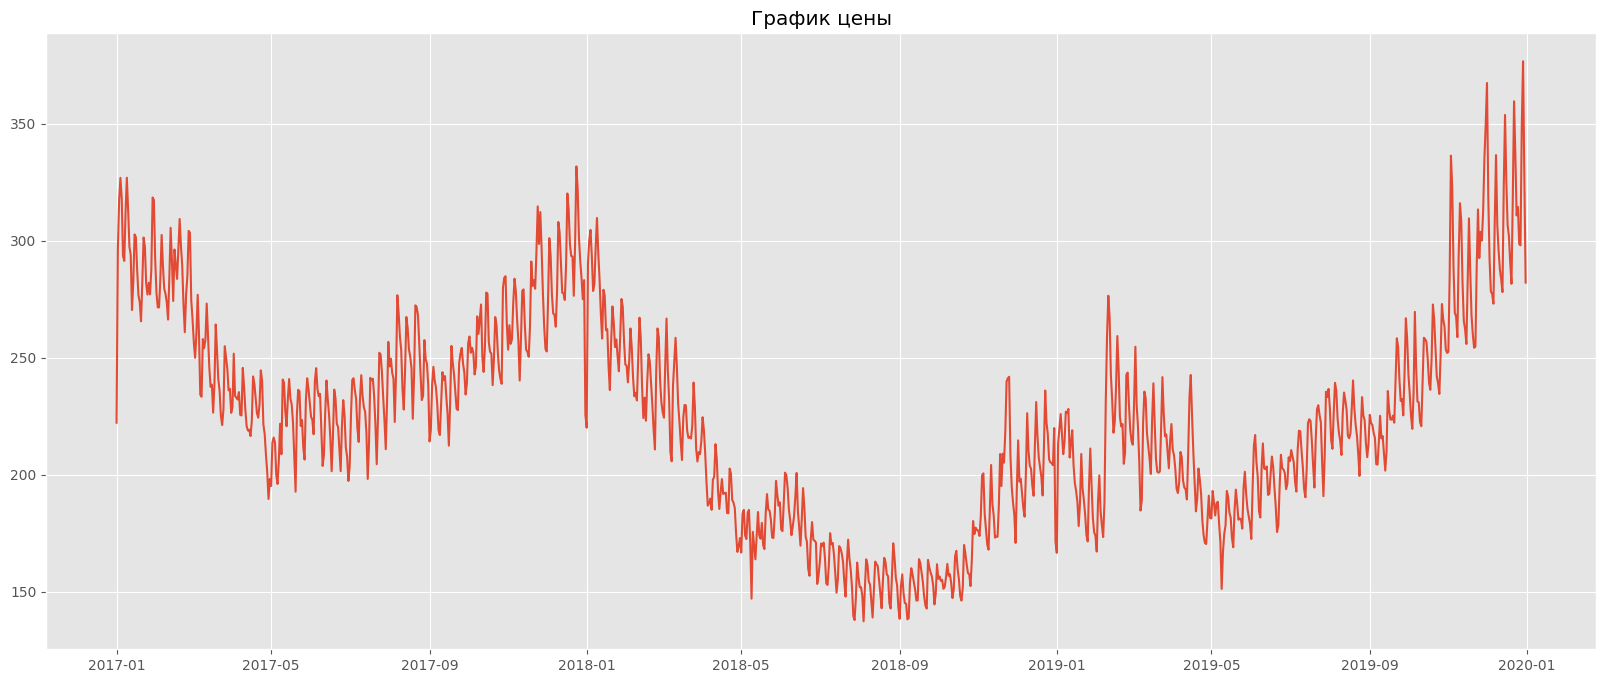

In [ ]:
# Отображение временного ряда в графическом виде
plt.figure(figsize=(20, 8))
plt.plot(data.index, data[COL_CLOSE])
plt.title('График цены')
plt.show()

**Определение гиперпараметров для модели**

В этом блоке задаются ключевые параметры, влияющие на обучение и прогнозирование модели.

INDICATOR_DEPTH = 6 — задаёт глубину расчёта индикаторов тренда, то есть количество шагов назад, которые будут учитываться при формировании признаков.

PREDICT_LAG = 1 — задаёт количество временных шагов вперёд, на которое будет сделан прогноз (здесь прогнозируется значение на следующий шаг).

In [ ]:
# Задание гиперпараметров
INDICATOR_DEPTH = 6                       # Глубина расчета индикаторов тренда (шаги)
PREDICT_LAG = 1                           # Количество шагов в будущее для предсказания

**Расчёт индикаторов относительной доходности**

В этом блоке создаются дополнительные признаки для модели — индикаторы относительной доходности за несколько временных шагов назад.

Цикл for i in range(1, INDICATOR_DEPTH + 1) перебирает периоды от 1 до INDICATOR_DEPTH (6 в нашем случае).

Для каждого шага создаётся новый столбец Close_chng_i, в котором хранится относительное изменение цены закрытия (Close) за соответствующий период, вычисляемое с помощью метода pct_change(i).

В конце выводится форма таблицы и первые 5 строк для проверки успешности добавления новых признаков.









In [ ]:
# Расчет индикаторов относительной доходности
for i in range(1, INDICATOR_DEPTH + 1):
    indicator_change = f'Close_chng_{i}'
    # Относительная доходность в сотых долях за период i шагов назад
    data[indicator_change] = data[COL_CLOSE].pct_change(i)

# Проверка результата
print(data.shape)
data[:5]

(1095, 7)


,Close,Close_chng_1,Close_chng_2,Close_chng_3,Close_chng_4,Close_chng_5,Close_chng_6
Datetime,,,,,,,
2017-01-01,222.26,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-02,295.93,0.331459,NaN,NaN,NaN,NaN,NaN
2017-01-03,317.26,0.072078,0.427427,NaN,NaN,NaN,NaN
2017-01-04,326.84,0.030196,0.104450,0.470530,NaN,NaN,NaN
2017-01-05,318.20,-0.026435,0.002963,0.075254,0.431657,NaN,NaN


**Удаление пропущенных значений и проверка формы данных**

В данном блоке выполняется очистка данных от строк, содержащих пропуски (NaN).

Команда data.dropna(inplace=True) удаляет все такие строки из датафрейма.

Затем выводится размерность очищенного датафрейма и первые пять строк для проверки успешности операции.


In [ ]:
# Удаление строк с неполными данными
data.dropna(inplace=True)

# Проверка результата
print(data.shape)
data[:5]

(1089, 7)


,Close,Close_chng_1,Close_chng_2,Close_chng_3,Close_chng_4,Close_chng_5,Close_chng_6
Datetime,,,,,,,
2017-01-07,291.39,-0.007324,-0.084255,-0.108463,-0.081542,-0.015341,0.311032
2017-01-08,312.44,0.072240,0.064386,-0.018102,-0.044058,-0.015193,0.055790
2017-01-09,326.90,0.046281,0.121864,0.113647,0.027341,0.000184,0.030385
2017-01-10,312.99,-0.042551,0.001760,0.074127,0.066260,-0.016373,-0.042375
2017-01-11,297.38,-0.049874,-0.090303,-0.048201,0.020557,0.013082,-0.065431


**Разделение данных на тренировочный, валидационный и тестовый наборы**

В этом блоке происходит разбиение исходного датасета на три части по временной оси:

- Сначала вычисляется общее количество строк total_len.

- Индексы для границ наборов считаются как 80% и 90% от длины данных.

- Тренировочный набор занимает первые 80% данных.

- Валидационный набор — следующие 10%.

- Тестовый набор — последние 10%.

In [ ]:
# Общее количество строк в данных
total_len = len(data)

# Индекс конца тренировочного набора (80% от всех данных)
train_end = int(total_len * 0.8)

# Индекс конца валидационного набора (90% от всех данных)
val_end = int(total_len * 0.9)

# Создаем тренировочный набор — первые 80% данных
train_df = data.iloc[:train_end]

# Создаем валидационный набор — следующие 10% данных после тренировочного
val_df = data.iloc[train_end:val_end]

# Создаем тестовый набор — оставшиеся 10% данных после валидационного
test_df = data.iloc[val_end:]

**Масштабирование данных с помощью MinMaxScaler**

В этом блоке происходит нормализация данных для улучшения работы модели:

- Создаются два объекта MinMaxScaler: один для признаков (feature_scaler), другой — для целевой переменной (target_scaler).

- Тренировочные признаки и целевая переменная масштабируются с помощью метода fit_transform, чтобы обучить скейлер и преобразовать данные.

- Валидационные и тестовые признаки и целевая переменная преобразуются с помощью метода transform без переобучения скейлера.

In [ ]:
# Создаем скейлеры для признаков и цели
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

# Обучаем и трансформируем тренировочные признаки, остальные только трансформируем
X_train = feature_scaler.fit_transform(train_df)
X_val = feature_scaler.transform(val_df)
X_test = feature_scaler.transform(test_df)

# Аналогично для целевой переменной 'Close'
y_train = target_scaler.fit_transform(train_df[['Close']])
y_val = target_scaler.transform(val_df[['Close']])
y_test = target_scaler.transform(test_df[['Close']])

**Создание генераторов временных рядов с помощью TimeseriesGenerator**

В этом блоке создаются генераторы данных для обучения, валидации и тестирования модели:

- Параметр seq_len = 60 задаёт длину входной последовательности (истории) для каждого обучающего примера — модель будет смотреть на последние 60 временных точек.

- batch_sz = 20 определяет размер батча для тренировочного и валидационного генераторов, что помогает оптимизировать обучение.

- TimeseriesGenerator автоматически формирует обучающие выборки в виде пар (последовательность признаков длиной 60, целевое значение).

- Для тренировочного (train_gen) и валидационного (val_gen) наборов используется батч по 20 примеров, а для тестового (test_gen) — по 1 примеру для точной поэлементной оценки прогноза.

- Параметры stride=1 и sampling_rate=1 означают, что последовательности формируются с шагом 1 и без пропусков между точками.

In [ ]:
seq_len = 60 # Длина последовательности (истории) для одного обучающего примера
batch_sz = 20 # Размер батча

# Генератор временных рядов для тренировочных данных
train_gen = TimeseriesGenerator(X_train, y_train,
                                length=seq_len, stride=1,
                                sampling_rate=1, batch_size=batch_sz)

# Генератор для валидационных данных
val_gen = TimeseriesGenerator(X_val, y_val,
                              length=seq_len, stride=1,
                              sampling_rate=1, batch_size=batch_sz)

# Генератор для тестовых данных (батч размером 1 для точной оценки)
test_gen = TimeseriesGenerator(X_test, y_test,
                               length=seq_len, stride=1,
                               sampling_rate=1, batch_size=1)

# Создание и обучение улучшенной модели LSTM

В этом блоке реализуется улучшенная рекуррентная нейронная сеть на базе LSTM для прогнозирования временного ряда:

- Модель Sequential() строится пошагово, сначала добавляется слой LSTM с 64 нейронами, который принимает входные данные длиной seq_len (60) с количеством признаков, равным числу столбцов в X_train. Параметр return_sequences=True позволяет следующему LSTM слою получать последовательность.

- Для регуляризации добавляется слой Dropout(0.2), который случайным образом отключает 20% нейронов во время обучения, что снижает переобучение.

- Затем идет второй LSTM слой с 32 нейронами и return_sequences=False, что означает выдачу только последнего состояния для последующего слоя.

- Финальный слой — плотный (Dense) с одним нейроном для регрессии (предсказания одного значения).

- Модель компилируется с оптимизатором adam и функцией потерь mse (среднеквадратичная ошибка).

- Обучение проводится 50 эпох с отображением прогресса (verbose=1), используя генераторы тренировочных и валидационных данных.

In [ ]:
# Улучшенная модель LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(64, input_shape=(seq_len, X_train.shape[1]), return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(32, return_sequences=False))
model_lstm.add(Dense(1))

# Компиляция и обучение
model_lstm.compile(optimizer='adam', loss='mse')
history = model_lstm.fit(train_gen, validation_data=val_gen, epochs=50, verbose=1)

Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0402 - val_loss: 0.0107
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0093 - val_loss: 0.0089
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0106 - val_loss: 0.0056
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0109 - val_loss: 0.0070
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0091 - val_loss: 0.0033
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0088 - val_loss: 0.0033
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0066 - val_loss: 0.0043
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0068 - val_loss: 0.0033
Epoch 9/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0073 - val_loss: 0.0035
Epoch 10/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0079 - val_loss: 0.0034
Epoch 11/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0078 - val_loss: 0.0037
Epoch 12/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0067 - v

**Визуализация процесса обучения модели**

В этом блоке строится график изменения ошибки модели (функции потерь) во время обучения:

- Используется функция plt.figure(figsize=(10, 4)) для создания графика с размером 10x4 дюйма.

- Основная кривая — history.history['loss'] — показывает ошибку на обучающем наборе данных по каждой эпохе.

- Если в истории обучения есть данные о валидационной ошибке (val_loss), она также отображается для сравнения.

- Заголовок графика (plt.title) информирует, что это процесс обучения модели.

- Оси X и Y подписаны как "Эпоха" и "Ошибка (MSE)" соответственно.


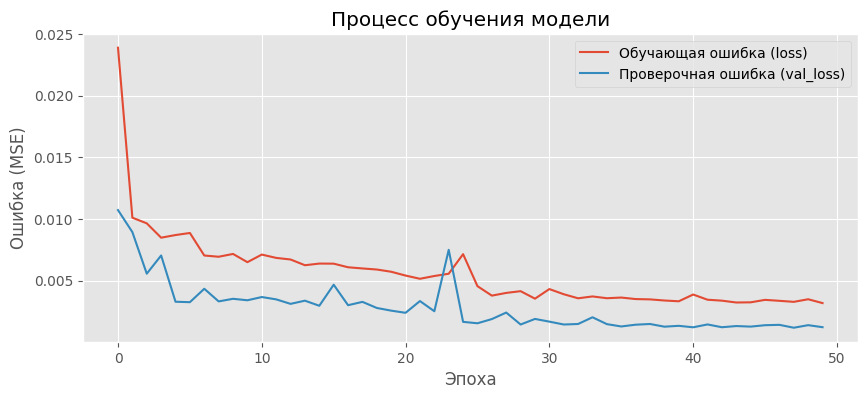

In [ ]:
# Визуализация процесса обучения
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Обучающая ошибка (loss)')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Проверочная ошибка (val_loss)')
plt.title('Процесс обучения модели')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка (MSE)')
plt.legend()
plt.grid(True)
plt.show()

**Визуализация прогноза и корреляций**

В этом блоке выполняется:

График прогнозных и фактических значений:

- Создается график размером 14x4 дюйма.

- Используется plt.plot для отображения реальных значений y_true и предсказанных моделью y_pred на первом plot_len отрезке.

Вычисление и визуализация корреляций с лагами:

- Создается список смещений (steps) от 0 до 30.

Для каждого смещения считается:

- Кросс-корреляция между прогнозом и фактом — насколько хорошо предсказание совпадает с реальными значениями при сдвиге.

- Автокорреляция самого фактического сигнала — как сильно значения зависят от своих сдвинутых версий.


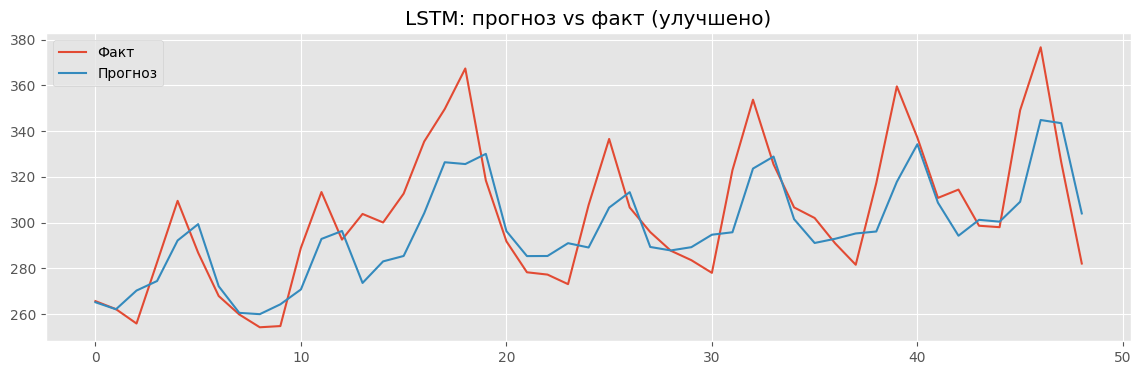

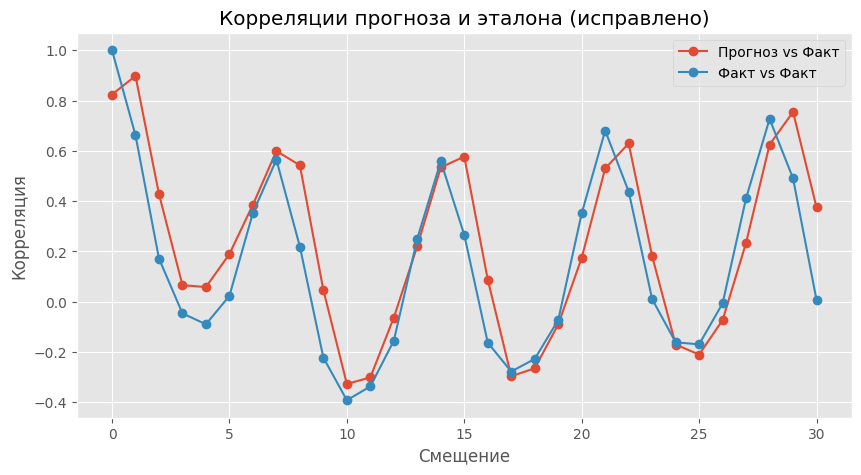

In [ ]:
# Визуализация прогноза
plt.figure(figsize=(14, 4))
plt.plot(y_true[:plot_len], label='Факт')
plt.plot(y_pred[:plot_len], label='Прогноз')
plt.title('LSTM: прогноз vs факт (улучшено)')
plt.legend()
plt.show()

# Корреляции (без ошибки размерностей)
steps = range(0, 31)
cross_corr = [np.corrcoef(y_true[:plot_len - s], y_pred[s:plot_len])[0, 1] for s in steps]
auto_corr  = [np.corrcoef(y_true[:plot_len - s], y_true[s:plot_len])[0, 1] for s in steps]

plt.figure(figsize=(10, 5))
plt.plot(steps, cross_corr, marker='o', label='Прогноз vs Факт')
plt.plot(steps, auto_corr, marker='o', label='Факт vs Факт')
plt.title('Корреляции прогноза и эталона (исправлено)')
plt.xlabel('Смещение')
plt.ylabel('Корреляция')
plt.legend()
plt.show()

# Выводы по заданию
В процессе выполнения работы видно, что полученная модель LSTM при параметре length = 60
успешно обучена на данных трафика сайта и обеспечивает высокое
соответствие между фактическими и предсказанными значениями. График
прогноза демонстрирует схожую структуру с реальными данными, а график
корреляций показывает высокую степень совпадения между прогнозом и
эталонным сигналом. Это подтверждает, что модель точно улавливает
временные зависимости и сезонные колебания трафика, как того требует
задание.